In [70]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D 
from tensorflow.keras.datasets import cifar10

# 이미 훈련과 테스트가 분리된 데이터임
(x_train,y_train),(x_test,y_test) = cifar10.load_data()



In [71]:
# 데이터의 크기 확인
# 28X28X1 = 흑백데이터다~ 


# 크기변경
x_train = x_train.reshape(50000, 32 * 32 * 3)
x_test = x_test.reshape(10000, 32 * 32 * 3)

print("train",x_train.shape,y_train.shape) #(50000, 32, 32, 3) (50000, 1)
print("test",x_test.shape,y_test.shape) # (10000, 32, 32, 3) (10000, 1)


train (50000, 32, 32, 3) (50000, 1)
test (10000, 32, 32, 3) (10000, 1)


In [59]:
# y의 클래스 보기
a,b = np.unique(y_train,return_counts=1)
# print(np.unique(y_train,return_counts=1))
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [60]:
# 크기변경
# x_train = x_train.reshape(50000, 32, 32, 3)
# x_test = x_test.reshape(50000, 32, 32, 3)

In [61]:
# # 이미지 시각화
# import matplotlib.pyplot as plt
# plt.imshow(x_train[1])

In [62]:
# 모델
# 베이스모델불러오기
# from tensorflow.keras.applications import efficientnet
# def build_model(input_shape, n_classes):

#     base_model = efficientnet.EfficientNetB0(input_shape=input_shape,
#                                       weights="imagenet",
#                                       include_top=False,
#                                       classes=10)

#     model = Sequential()
#     model.add(base_model)
#     model.add(GlobalAveragePooling2D())
#     model.add(Dropout(0.5))
#     model.add(Dense(n_classes, activation='softmax'))
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     return model

# model = build_model(input_shape=(32, 32, 3), n_classes=10)
# model.summary()

In [63]:
model = Sequential([
    # 5X5 이미지 채널 1개 
    # 필터 = output 노드수 
    # 자르는 필터는 2X2 사이즈 
    Dense(64,input_dim=3072,activation="relu"),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                196672    
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 10)                170       
                                                                 
Total params: 199,450
Trainable params: 199,450
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [65]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

earlyStopping = EarlyStopping(monitor="val_loss",
                              mode="min",patience =15,
                              # True 면 좋았던 웨이트로 복원됨
                              # False 면 마지막 웨이트로 놔둠..
                              restore_best_weights=True,
                              verbose=1                              
                              )
# 모델체크포인트는 가장 낮은 val_loss 가 갱신 될 떄 마다 저장합니다.

mcp = ModelCheckpoint(
    monitor="val_loss",
    mode="auto",
    save_best_only=True,
    filepath= "cifar.h5",
    verbose=1 
)


hist = model.fit(
                x_train,
                y_train,
                epochs=100,
                batch_size=64,
                validation_split=0.2,
                verbose=1,
                callbacks = [earlyStopping,mcp],      
                )

Epoch 1/100
621/625 [============================>.] - ETA: 0s - loss: 5.0775 - acc: 0.0977
Epoch 00001: val_loss improved from inf to 2.30647, saving model to cifar.h5
625/625 [==============================] - 2s 3ms/step - loss: 5.0597 - acc: 0.0977 - val_loss: 2.3065 - val_acc: 0.0951
Epoch 2/100
618/625 [============================>.] - ETA: 0s - loss: 2.3029 - acc: 0.0983
Epoch 00002: val_loss did not improve from 2.30647
625/625 [==============================] - 2s 3ms/step - loss: 2.3029 - acc: 0.0984 - val_loss: 2.3066 - val_acc: 0.0979
Epoch 3/100
617/625 [============================>.] - ETA: 0s - loss: 2.3028 - acc: 0.0980
Epoch 00003: val_loss did not improve from 2.30647
625/625 [==============================] - 2s 3ms/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3073 - val_acc: 0.0980
Epoch 4/100
620/625 [============================>.] - ETA: 0s - loss: 2.3034 - acc: 0.0983
Epoch 00004: val_loss improved from 2.30647 to 2.30307, saving model to cifar.h5
625/625 [

In [66]:
loss,acc = model.evaluate(x_test,y_test)
print("loss : ",loss)
print("acc : ",acc)


313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - acc: 0.1000
loss :  2.3025941848754883
acc :  0.10000000149011612


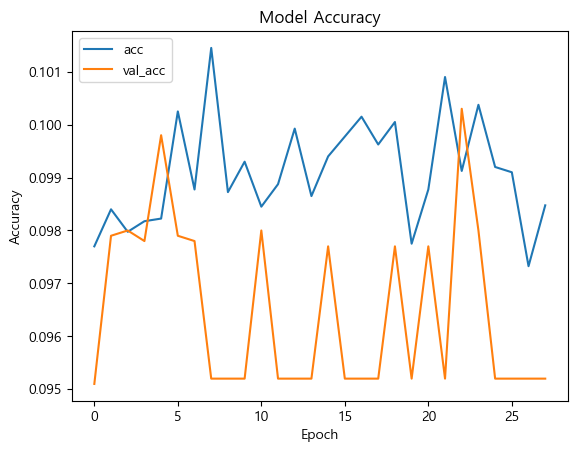

In [67]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

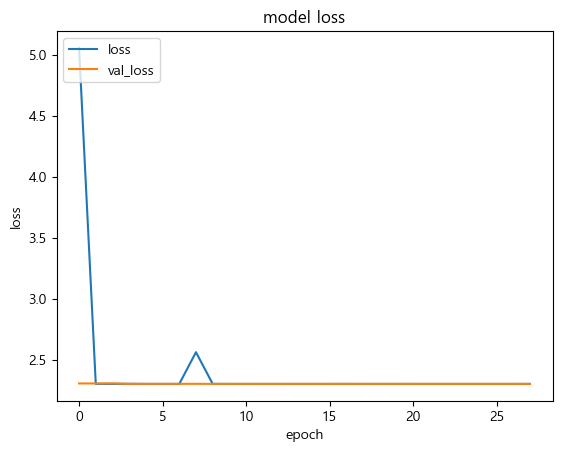

In [68]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()